In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
loan = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Financial-Analytics-Loan-Approval-Prediction/main/loan_prediction.csv")

In [4]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002300,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [10]:
loan.Gender.fillna(loan.Gender.mode()[0],inplace = True)

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
loan.Gender.fillna(loan.Gender.mode()[0],inplace = True)
loan.Self_Employed.fillna(loan.Self_Employed.mode()[0],inplace = True)
loan.Self_Employed.fillna(loan.Self_Employed.mode()[0],inplace = True)
loan.LoanAmount.fillna(loan.LoanAmount.median(),inplace = True)
loan.Loan_Amount_Term.fillna(loan.Loan_Amount_Term.mode()[0],inplace = True)
loan.Credit_History.fillna(loan.Credit_History.mode()[0],inplace = True)
loan.Dependents.fillna(loan.Dependents.mode()[0], inplace = True)

In [13]:
loan.Married.fillna(loan.Married.mode()[0], inplace = True)

In [14]:
loan["Dependents"] = loan["Dependents"].replace("3+",int(3))
loan["Dependents"] = pd.to_numeric(loan["Dependents"])

<AxesSubplot:>

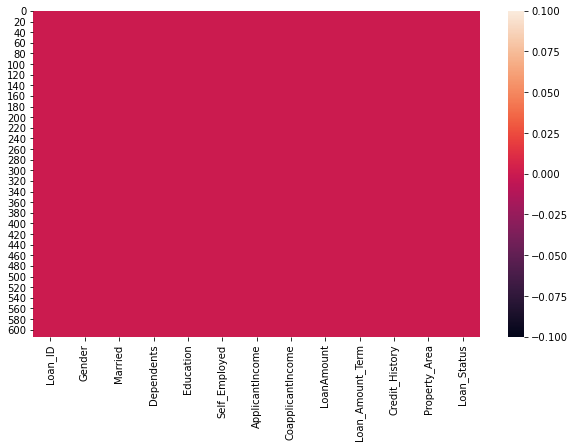

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(loan.isnull())

In [16]:
gender = pd.get_dummies(loan.Gender,drop_first = True)
gender

,Male
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [17]:
married = pd.get_dummies(loan.Married,drop_first = True)
married = married.rename(columns = {"Yes":"married"})
married

,married
0,0
1,1
2,1
3,1
4,0
...,...
609,0
610,1
611,1
612,1


In [18]:
edu = pd.get_dummies(loan.Education,drop_first = True)
edu

,Not Graduate
0,0
1,0
2,0
3,1
4,0
...,...
609,0
610,0
611,0
612,0


In [19]:
slfemp = pd.get_dummies(loan.Self_Employed,drop_first = True)
slfemp = slfemp.rename(columns = {"Yes":"self_emp"})
slfemp

,self_emp
0,0
1,0
2,1
3,0
4,0
...,...
609,0
610,0
611,0
612,0


In [20]:
cre_his = pd.get_dummies(loan.Credit_History,drop_first = True)
cre_his = cre_his.rename(columns = {1.0:"credit_history"})
cre_his

,credit_history
0,1
1,1
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [21]:
prop = pd.get_dummies(loan.	Property_Area,drop_first = True)
prop

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [22]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
loan = pd.concat([loan,gender,married,edu,slfemp,cre_his,prop],axis = 1)
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,married,Not Graduate,self_emp,credit_history,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,0,0,1,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,0,0,1,0,0
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,0,0,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,1


In [24]:
loan = loan.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Credit_History","Property_Area"],axis = 1)

In [25]:
loan

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,married,Not Graduate,self_emp,credit_history,Semiurban,Urban
0,0,5849,0.0,128.0,360.0,Y,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,N,1,1,0,0,1,0,0
2,0,3000,0.0,66.0,360.0,Y,1,1,0,1,1,0,1
3,0,2583,2358.0,120.0,360.0,Y,1,1,1,0,1,0,1
4,0,6000,0.0,141.0,360.0,Y,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,Y,0,0,0,0,1,0,0
610,3,4106,0.0,40.0,180.0,Y,1,1,0,0,1,0,0
611,1,8072,240.0,253.0,360.0,Y,1,1,0,0,1,0,1
612,2,7583,0.0,187.0,360.0,Y,1,1,0,0,1,0,1


In [26]:
corr = loan.corr()
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Male,married,Not Graduate,self_emp,credit_history,Semiurban,Urban
Dependents,1.000000,0.118202,0.030430,0.163103,-0.103864,0.172914,0.334216,0.055752,0.056798,-0.040160,0.001924,-0.001198
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.046531,0.058809,0.051708,-0.140760,0.127180,-0.018615,-0.014246,-0.000598
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.059383,0.082912,0.075948,-0.062290,-0.016100,0.011134,-0.027044,0.022776
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,0.106904,0.146546,-0.168759,0.115100,-0.000607,-0.005804,-0.036050
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036960,1.000000,-0.074030,-0.100912,-0.073928,-0.033739,-0.004705,0.059141,-0.094279
Male,0.172914,0.058809,0.082912,0.106904,-0.074030,1.000000,0.364569,0.045364,-0.000525,0.009170,-0.108623,0.034530
married,0.334216,0.051708,0.075948,0.146546,-0.100912,0.364569,1.000000,0.012304,0.004489,0.010938,0.005845,0.000546
Not Graduate,0.055752,-0.140760,-0.062290,-0.168759,-0.073928,0.045364,0.012304,1.000000,-0.010383,-0.073658,-0.039410,-0.034279
self_emp,0.056798,0.127180,-0.016100,0.115100,-0.033739,-0.000525,0.004489,-0.010383,1.000000,-0.001550,0.008710,-0.030338
credit_history,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,0.009170,0.010938,-0.073658,-0.001550,1.000000,0.035976,-0.016934


<AxesSubplot:>

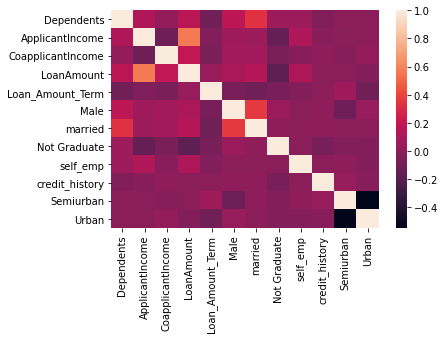

In [27]:
sns.heatmap(corr)

## Data Split

In [28]:
X = loan.drop("Loan_Status",axis = 1)
y = loan.Loan_Status

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

## Model Fitting

In [30]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
predictions = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.827027027027027